#### Neutrality plot (GC12 vs. GC3). 

每一条CDS计算得到一个样本数据（GC12和GC3）。

GC12表示密码子第一二位的GC含量均值，而GC3表示密码子第三位的GC含量。其中：

（1）	在计算密码子的3个位置的GC含量时，密码子Met（ATG）和Trp（TGG）需要去除；

（2）	在计算GC3时，需要去除3个终止密码子（TAA，TAG和TGA）和Ile的3个密码子（ATT、ATC和ATA）


In [2]:
import pandas as pd
import numpy as np
import os
from collections import defaultdict

In [3]:
indir = 'filtered_data'
cds_files = sorted([os.path.join(indir, f) for f in os.listdir(indir)
                       if f.endswith('.txt')])

titles = ['Miscanthus floridulus', 'Miscanthus x giganteus', 'Miscanthus sacchariflorus', 
          'Miscanthus sinensis', 'Miscanthus transmorrisonensis', 'Saccharum spontaneum',
          'Sorghum bicolor']

for i,j in zip(cds_files, titles):
    print(i,j)

filtered_data/Miscanthus_floridulus.txt Miscanthus floridulus
filtered_data/Miscanthus_giganteus.txt Miscanthus x giganteus
filtered_data/Miscanthus_sacchariflorus.txt Miscanthus sacchariflorus
filtered_data/Miscanthus_sinensis.txt Miscanthus sinensis
filtered_data/Miscanthus_transmorrisonensis.txt Miscanthus transmorrisonensis
filtered_data/Saccharum_spontaneum.txt Saccharum spontaneum
filtered_data/Sorghum_bicolor.txt Sorghum bicolor


In [4]:
def calc_GC(cds):
    """计算每条CDS的GC12和GC3
    """
    GC1 = 0
    GC2 = 0
    base12 = 0
    GC3 = 0
    base3 = 0
    for idx in range(0, len(cds), 3):
        codon = cds[idx:idx+3]
        if (codon!='ATG') and (codon!='TGG'):
            # 计算GC12
            if (codon[0]=='G') or (codon[0]=='C'):
                GC1 += 1
            if (codon[1]=='G') or (codon[1]=='C'):
                GC2 += 1
            base12 += 2
            
            if codon not in ['TAA','TAG','TGA','ATT','ATC','ATA']:
                # 计算GC3
                if (codon[2]=='G') or (codon[2]=='C'):
                    GC3 += 1
                base3 += 1
#     print('GC1: ', GC1)
#     print('GC2: ', GC2)
#     print('base12: ', base12)
#     print('GC3: ', GC3)
#     print('base3: ', base3)
    GC12 = (GC1+GC2)/base12
    GC3 = GC3/base3
    
    return GC12, GC3


def read_fasta(fasta):
    GC12s = []
    GC3s = []
    with open(fasta) as f:
        for line in f:
            if not line.strip().startswith('>'):
                GC12, GC3 = calc_GC(line.strip())
                GC12s.append(GC12)
                GC3s.append(GC3)
                
    return GC12s, GC3s

In [5]:
GC12s, GC3s = read_fasta(cds_files[0])

1 filtered_data/Miscanthus_floridulus.txt Miscanthus floridulus
2 filtered_data/Miscanthus_giganteus.txt Miscanthus x giganteus
3 filtered_data/Miscanthus_sacchariflorus.txt Miscanthus sacchariflorus
4 filtered_data/Miscanthus_sinensis.txt Miscanthus sinensis
5 filtered_data/Miscanthus_transmorrisonensis.txt Miscanthus transmorrisonensis
6 filtered_data/Saccharum_spontaneum.txt Saccharum spontaneum
7 filtered_data/Sorghum_bicolor.txt Sorghum bicolor


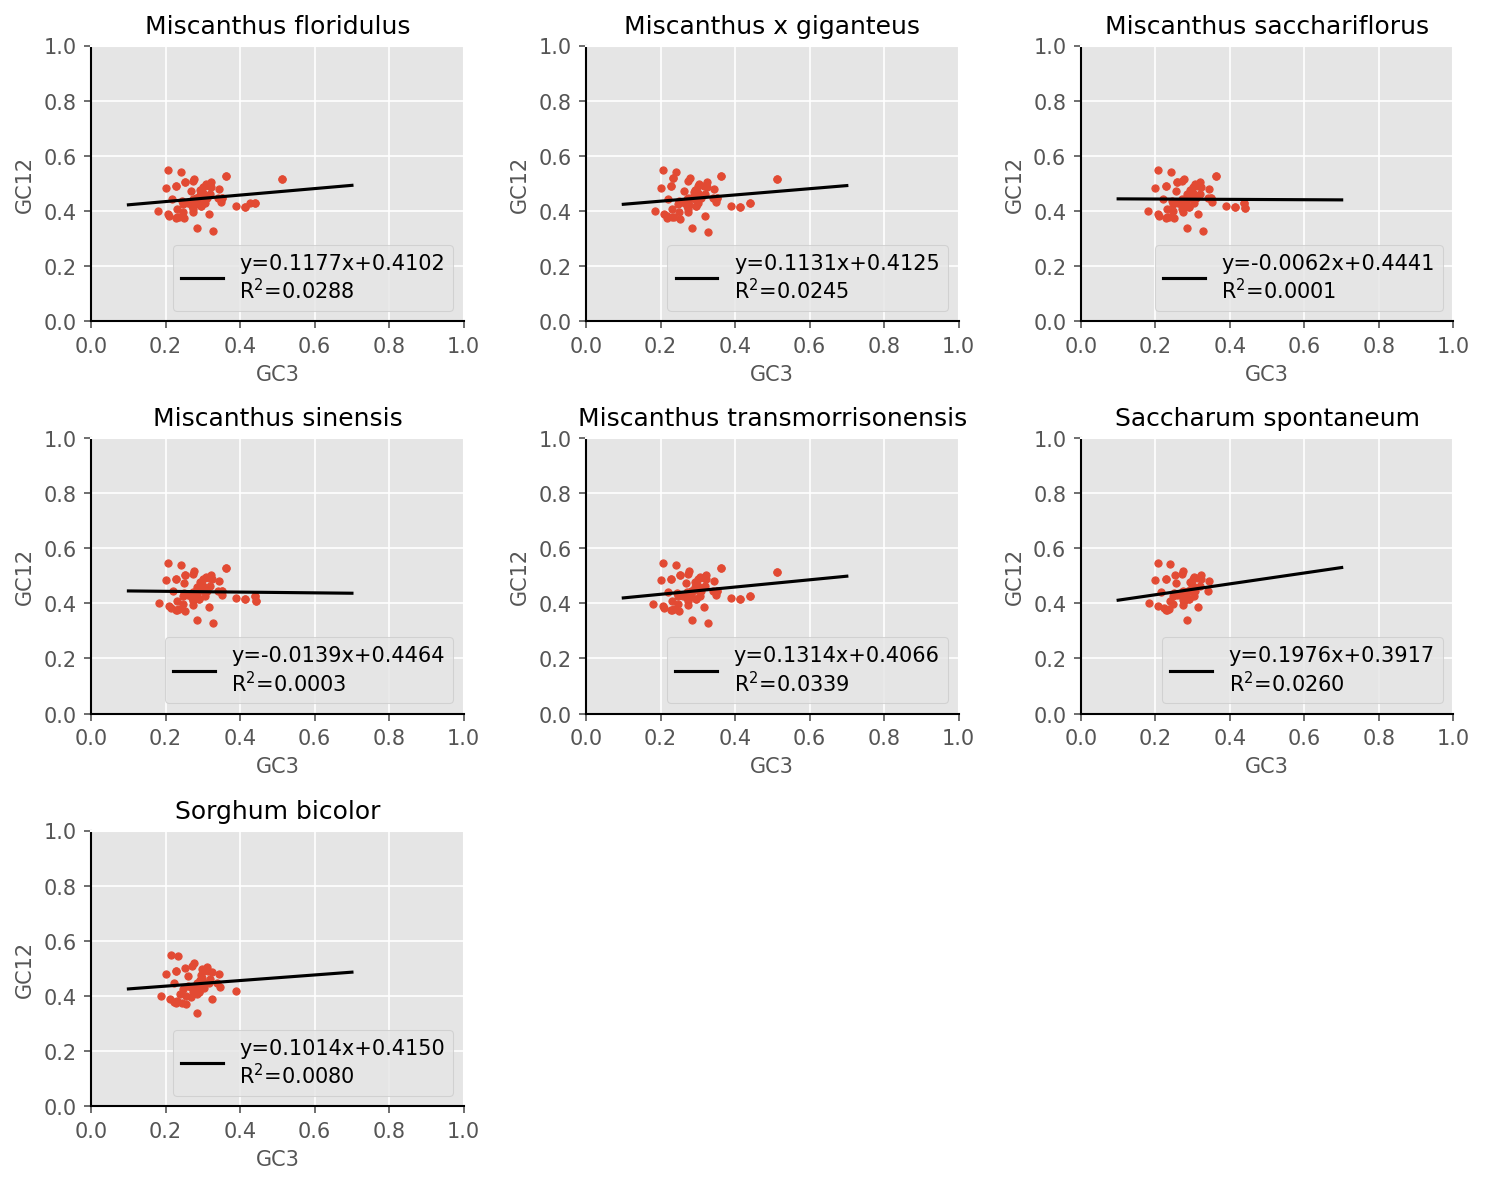

In [7]:
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(10, 8), dpi=150)

for i, (f, title) in enumerate(zip(cds_files, titles), 1):
    print(i, f, title)
    plt.subplot(3, 3, i)
    GC12s, GC3s = read_fasta(f)
    slope, intercept, r_value, p_value, std_err = stats.linregress(GC3s, GC12s)

    line = [slope*x + intercept for x in np.linspace(0.1, 0.7, 50)]
    plt.plot(np.linspace(0.1, 0.7, 50), line, 'black', 
             label='y={:.4f}x+{:.4f}\nR$^2$={:.4f}'.format(slope, intercept, r_value**2),
             zorder=1)
    plt.legend(loc='lower right', fontsize=10)
    plt.scatter(GC3s, GC12s, zorder=1, s=12)
    plt.xlabel('GC3', fontsize=10)
    plt.ylabel('GC12', fontsize=10)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title, fontsize=12)

    ax = plt.gca()#获取边框
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')

plt.tight_layout()
plt.savefig('Step6_Neutrality_plot.png')

In [57]:
print(slope, intercept, r_value, p_value)

0.11773710828980014 0.41016495976205064 0.16959901150360485 0.176814797286654


In [59]:
from sklearn.metrics import r2_score


In [65]:
y_pred = [slope*x + intercept for x in GC3s]

In [66]:
r2_score(GC12s, y_pred)

0.028763824702999763